
# Fasion MNIST

Vamos a reentrenar nuestra VGG pero con el conjunto de datos de moda

In [35]:
%matplotlib inline

from tensorflow.keras.utils                import to_categorical
from tensorflow                            import keras 
from tensorflow.keras                      import backend as K
from tensorflow.keras.preprocessing.image  import load_img
from tensorflow.keras.layers               import Input, Dense, Flatten, Lambda, Dropout
from tensorflow.keras.layers               import AveragePooling2D
from tensorflow.keras.optimizers           import Adam
from tensorflow.keras.models               import Sequential, Model, load_model
from tensorflow.keras                      import applications  
from tensorflow.keras.datasets             import fashion_mnist
from tensorflow.keras                      import layers
from tensorflow.keras.applications.vgg16   import VGG16
import tensorflow as tf
import PIL
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


In [36]:
((X_tr, y_tr),(X_ts,y_ts)) = tf.keras.datasets.fashion_mnist.load_data()

In [37]:
X_ts = X_ts.reshape(-1, 28, 28, 1).astype('float32') / 255
X_tr = X_tr.reshape(-1, 28, 28, 1).astype('float32') / 255
X_tr.shape

(60000, 28, 28, 1)

In [38]:
X_ts.reshape(-1, 28, 28, 1).shape

(10000, 28, 28, 1)

In [39]:
Y_ts = to_categorical(y_ts)
Y_tr = to_categorical(y_tr)
Y_tr.shape

(60000, 10)

### Aplicaciones de Keras

![Aplicaciones](./keras_aplications.png)

Keras ya tiene modelos preentrenados que pueden ver en [keras applications](https://keras.io/api/applications/) que tiene varias redes, entre ellas VGG, pero también muchas otras muy sofisticadas que usarán dependiendo de su problema.

No estaría mal que las revisaran.

In [40]:
vgg = VGG16(input_shape = (128, 128, 3), include_top = False, weights="imagenet")

for ly in vgg.layers:
    ly.trainable = False

In [41]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [72]:
nuevo = Sequential()

for ly in nuevo.layers:
    ly.trainable = False

nuevo.add(Flatten())
nuevo.add(Dense(128, activation='relu'))
nuevo.add(Dropout(0.5))
nuevo.add(Dense(64, activation='relu'))
nuevo.add((Dropout(0.25)))
nuevo.add(Dense(10, activation="softmax"))

In [81]:
opt = Adam(learning_rate=1e-3)
nuevo.compile(
    loss = "categorical_crossentropy",
    optimizer = opt,
    metrics = ['accuracy']
)

In [82]:
history = nuevo.fit(x=X_tr, y=Y_tr, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.4603 - accuracy: 0.8402
Epoch 2/10
1875/1875 - 6s - loss: 0.4473 - accuracy: 0.8425
Epoch 3/10
1875/1875 - 6s - loss: 0.4308 - accuracy: 0.8475
Epoch 4/10
1875/1875 - 6s - loss: 0.4234 - accuracy: 0.8494
Epoch 5/10
1875/1875 - 6s - loss: 0.4107 - accuracy: 0.8513
Epoch 6/10
1875/1875 - 6s - loss: 0.4093 - accuracy: 0.8534
Epoch 7/10
1875/1875 - 6s - loss: 0.3955 - accuracy: 0.8587
Epoch 8/10
1875/1875 - 7s - loss: 0.3918 - accuracy: 0.8580
Epoch 9/10
1875/1875 - 6s - loss: 0.3875 - accuracy: 0.8605
Epoch 10/10
1875/1875 - 6s - loss: 0.3788 - accuracy: 0.8631


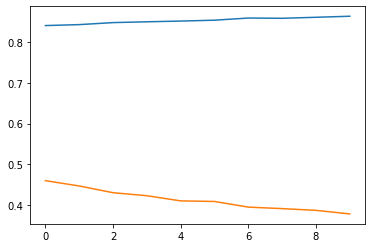

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

In [84]:
nuevo.evaluate(X_ts,Y_ts)

313/313 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8702


[0.3639747202396393, 0.870199978351593]

Ahora, usamos el modelo *conv_digist.h5*.

In [85]:
modelo = load_model('conv_digits.h5')
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [86]:
nuevo = Sequential()
for ly in range(len(modelo.layers)-3):
    nuevo.add(modelo.layers[ly])

for ly in nuevo.layers:
    ly.trainable = False

In [87]:
nuevo.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
Total params: 1,248
Trainable params: 0
Non-trainable params: 1,248
_________________________________________________________________


In [88]:
nuevo.add(Dense(128, activation='tanh', name="densa_a" ))
nuevo.add(Dropout(0.5, name="dropout_a"))
nuevo.add(Dense(64, activation='tanh', name="densa_b" ))
nuevo.add((Dropout(0.25, name="dropout_b")))
nuevo.add(Dense(10, activation="softmax"))

In [89]:
nuevo.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
densa_a (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout_a (Dropout)          (None, 128)             

In [90]:
opt = Adam(learning_rate=1e-3)
nuevo.compile(
    loss = "categorical_crossentropy",
    optimizer = opt,
    metrics = ['accuracy']
)

In [91]:
H = nuevo.fit(x=X_tr, y=Y_tr,
             batch_size=32,
             epochs=10,
             verbose=4)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


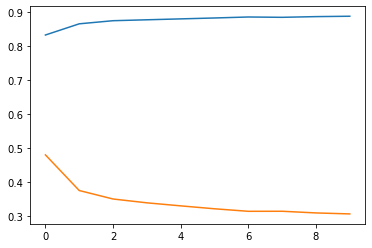

In [92]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['loss'])

In [93]:
nuevo.evaluate(X_ts,Y_ts)

313/313 [==============================] - 3s 10ms/step - loss: 0.3081 - accuracy: 0.8910


[0.3080648183822632, 0.890999972820282]

### VS

Podemos notar que la precisión fue mejor usando el modelo *conv_digits.h5*, ya que obtuvimos un $0.89\%$ en este rubro (versus una precisión del $0.87\%$ usando el modelo pre-entrenado vgg16).